## Общая информация

**Срок сдачи:** 5 апреля 2022, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [1248]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_openml, fetch_20newsgroups
from sklearn.neighbors import KDTree

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from scipy.spatial.distance import cdist 

### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [1249]:
class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm='brute', clusters=3):
        self.n_neighbors = n_neighbors
        self.clusters = clusters
        self.algorithm = algorithm
        
    def fit(self, X, y):
        self.X_train = np.copy(X)
        self.y_train = np.copy(y)
        
    def predict(self, X):
        def exp_d(x):
            return 0.05 ** x
        def k_d(x):
            return 1 / (x + 0.1)
        if self.algorithm =='brute':
            y = np.empty(X.shape[0], dtype=int)
            for j, x in enumerate(X):
                distances = cdist(x.reshape(1, -1), self.X_train, metric="minkowski", p=2)[0]
                idx = np.argpartition(distances, kth=self.n_neighbors)[:self.n_neighbors]
                weights = exp_d(distances[idx])
                y[j] = np.argmax([(weights * (self.y_train[idx] == i)).sum() for i in range(self.clusters)])    
            return y
        elif self.algorithm =='kd_tree':
            y = np.empty(X.shape[0], dtype=int)
            tree = KDTree(X_train, leaf_size=3)
            for j, x in enumerate(X):
                dist, idx = tree.query(x.reshape(1, -1), k=self.n_neighbors)
                weights = k_d(dist)
                y[j] = np.argmax([(weights * (self.y_train[idx] == i)).sum() for i in range(self.clusters)])    
            return y
                

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [1250]:
iris = datasets.load_iris()

In [1251]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [1252]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [1253]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [1254]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
print(sklearn_pred)
print(my_clf_pred)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

[2 1 1 0 0 0 2 0 2 0 1 1 1 2 2]
[2 1 1 0 0 0 2 0 2 0 1 1 1 2 2]


### Задание 2 (0.5 балла)

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [1255]:
%time clf.fit(X_train, y_train)

CPU times: total: 15.6 ms
Wall time: 998 µs


KNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [1256]:
%time my_clf.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 0 ns


In [1257]:
%time clf.predict(X_test)

CPU times: total: 0 ns
Wall time: 2.13 ms


array([2, 1, 1, 0, 0, 0, 2, 0, 2, 0, 1, 1, 1, 2, 2])

In [1258]:
%time my_clf.predict(X_test)

CPU times: total: 0 ns
Wall time: 1.5 ms


array([2, 1, 1, 0, 0, 0, 2, 0, 2, 0, 1, 1, 1, 2, 2])

### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [1259]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [1260]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [1261]:
%time clf.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 1.11 ms


KNeighborsClassifier(algorithm='kd_tree', n_neighbors=2)

In [1262]:
%time my_clf.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 997 µs


In [1265]:
%time clf.predict(X_test)

CPU times: total: 0 ns
Wall time: 2.99 ms


array([2, 0, 0, 2, 2, 1, 2, 2, 0, 0, 1, 1, 0, 1, 2])

In [1266]:
%time my_clf.predict(X_test)

CPU times: total: 0 ns
Wall time: 3.35 ms


array([2, 0, 0, 2, 2, 1, 2, 2, 0, 0, 1, 1, 0, 1, 2])

In [1267]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
print(sklearn_pred)
print(my_clf_pred)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

[2 0 0 2 2 1 2 2 0 0 1 1 0 1 2]
[2 0 0 2 2 1 2 2 0 0 1 1 0 1 2]


### Задание 4 (2.5 балла)

Рассмотрим новый датасет 20 newsgroups

In [1310]:
from sklearn.feature_extraction.text import CountVectorizer

In [1311]:
newsgroups = fetch_20newsgroups(subset='train', remove=['headers','footers', 'quotes'])

In [1312]:
data = newsgroups['data']
target = newsgroups['target']

In [1313]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.25)

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [1331]:
vectorizer = CountVectorizer(max_features=71018)
X_train_Count = vectorizer.fit_transform(X_train)
X_test_Count = vectorizer.fit_transform(X_test)

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

In [1332]:
from sklearn import model_selection
best_score = 0
score_values = []
k_n = []
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_Count, y_train)
    cv_results = model_selection.cross_validate(knn, X_test_Count, y_test, cv=3)
    score = np.mean(cv_results['test_score'])
    if score > best_score:
        best_score = score
        c = k
    score_values.append(score)
    k_n.append(k)
print(c, best_score)

1 0.1452810180275716


Text(0, 0.5, 'mean score')

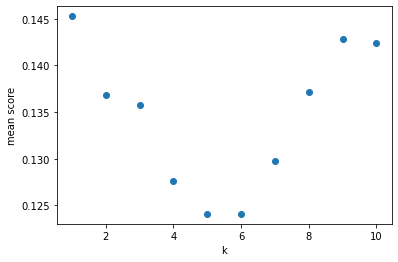

In [1333]:
plt.scatter(k_n, score_values)
plt.xlabel("k")
plt.ylabel("mean score")

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

In [1334]:
best_score = 0
score_values = []
k_n = []
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors = k, metric='cosine')
    knn.fit(X_train_Count, y_train)
    cv_results = model_selection.cross_validate(knn, X_test_Count, y_test, cv=3)
    score = np.mean(cv_results['test_score'])
    if score > best_score:
        best_score = score
        c = k
    score_values.append(score)
    k_n.append(k)
print(c, best_score)

2 0.20714033227288794


Text(0, 0.5, 'mean score')

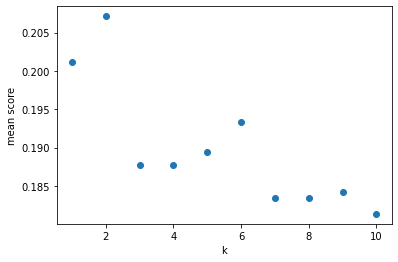

In [1335]:
plt.scatter(k_n, score_values)
plt.xlabel("k")
plt.ylabel("mean score")

## Косинусная мера дала лучший результат

In [1336]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [1337]:
tfidf_vectorizer = TfidfVectorizer()
X_train_idf = tfidf_vectorizer.fit_transform(X_train)
X_test_idf = tfidf_vectorizer.fit_transform(X_test)

In [1338]:
best_score = 0
score_values = []
k_n = []
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors = k, metric='cosine')
    knn.fit(X_train_idf, y_train)
    cv_results = model_selection.cross_validate(knn, X_test_idf, y_test, cv=3)
    score = np.mean(cv_results['test_score'])
    if score > best_score:
        best_score = score
        c = k
    score_values.append(score)
    k_n.append(k)
print(c, best_score)

1 0.448214916931778


Text(0, 0.5, 'mean score')

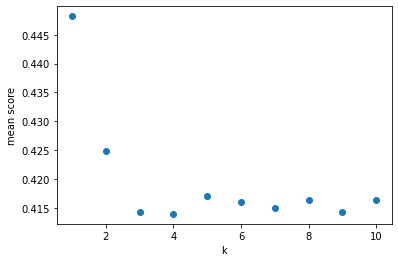

In [1339]:
plt.scatter(k_n, score_values)
plt.xlabel("k")
plt.ylabel("mean score")

## TF_IDF векторизация оказалась лучше

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [1340]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [1341]:
data_test = newsgroups['data']
target_test = newsgroups['target']

In [1342]:
vectorizer_test = CountVectorizer()
X_train_test = vectorizer.fit_transform(data_test)

In [1344]:
knn = KNeighborsClassifier(n_neighbors = 2, metric='cosine')
knn.fit(X_train_Count, y_train)
knn.score(X_train_test, target_test)

0.057222517259691984

`Отличается от кросс-валидации примерно в 3 раза.`